In [1]:
!curl -o image.jpg https://www.upscalelivingmag.com/wp-content/uploads/2021/02/summer-beach-time.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65570  100 65570    0     0   288k      0 --:--:-- --:--:-- --:--:--  289k


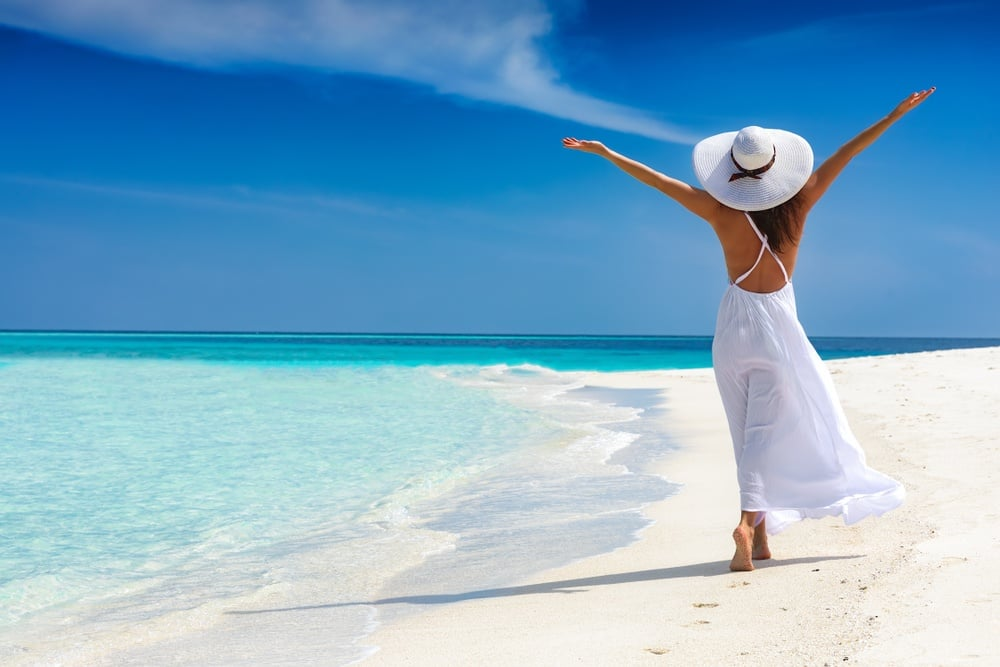

In [2]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [4]:
!pip install -q -U google-generativeai

In [5]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [6]:
# Used to securely store your API key
from google.colab import userdata

In [7]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [8]:
model = genai.GenerativeModel('gemini-pro-vision')

In [9]:
response = model.generate_content(img)

to_markdown(response.text)

>  The photo shows a woman in a white dress and hat walking on a tropical beach with her arms outstretched. The water is a beautiful blue-green color and the sand is white and soft. The sky is blue and there are a few white clouds in the distance. The woman is smiling and looks happy and relaxed. The photo is taken from behind and the woman's face is not visible.

In [11]:
model = genai.GenerativeModel('gemini-pro')

In [12]:
%%time
text_to_generate = f"generate hashtags on: {response.text}"
response = model.generate_content(text_to_generate)

CPU times: user 87.9 ms, sys: 12.1 ms, total: 100 ms
Wall time: 5.48 s


In [13]:
to_markdown(response.text)

> #BeachVibes #TropicalParadise #IslandLife #BeachBabe #VacationGoals #SummerFeels #CoastalLiving #SeashoreSerenade #OceanLover #SaltyHairDontCare #BeachBum #ShorelineSerenity #SandyToesSunnySoul #SeascapeEscape #BeachBliss #VitaminSea #CoastalWandering #TranquilSeas #SeashellsAndSunsets #BarefootMoments #OceanEmbrace #SeascapeSymphony